In [4]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
"""
prepare function
"""
def func(x, y):
    return (0.75 * x - 1.50)**2 + (y-2.0)**2 + 0.25*x*y

def funcGrad(vx, vy):
    dfdx = 1.125*vx - 2.25 + 0.25*vy
    dfdy = 2.0*vy -4.0+ 0.25*vx
    return np.array([dfdx, dfdy])


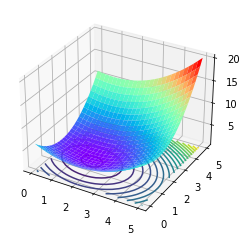

In [8]:
"""
show data image.
"""
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x, y)
lev = np.linspace(0, 20, 21)

fig = plt.figure()
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(x, y, z, cmap='rainbow')
plt.contour(x, y, z, levels=lev, offset=0) # 等高线
plt.show()

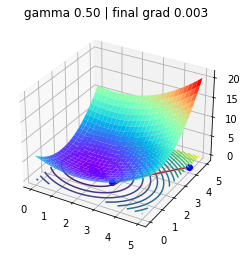

In [24]:
"""
gradient descent
"""
vInit = np.array([5,4])
numIter = 10
values = np.zeros([numIter, 2])
values[0]= vInit
v = vInit

gamma = 0.5 # learning rate

for i in range(1, numIter):
    v = v - gamma * funcGrad(v[0], v[1])
    values[i,:]= v
    
    
fig = plt.figure()
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(x, y, z, cmap='rainbow')
ax3d.scatter3D(v[0], v[1], func(v[0], v[1]), cmap='Blues')
plt.contour(x, y, z, levels = lev, offset=0)
plt.plot(values[:,0], values[:,1], 'r-')
plt.plot(values[:,0], values[:,1], 'bo')
gradNorm = LA.norm(funcGrad(v[0],v[1]))
title = "gamma %0.2f | final grad %0.3f" % (gamma, gradNorm)
plt.title(title)
plt.show()